# ANÁLISIS DEL IMPACTO DEL GASTO EN FICHAJES DEL FC BARCELONA (2013 -2023)

## PASO 1: Definimos el objetivo

En este caso vamos a analizar si el gasto en fichajes del FC Barcelona entre 2013 y 2023 ha generado un impacto positivo en el rendimiento deportivo ( títulos, posición en liga, etc..)

# PASO 2: Conseguir y preparar los datos

# - ¿Qué datos vamos a necesitar?
* 1.- Temporada
* 2.- Gasto en fichajes (entradas)
* 3.- Ingreso por ventas (salidas)
* 4.- Balance neto
* 5.- Títulos ganados
* 6.- Posición en liga
* 7.- Rendimiento en Champions

# PASO 3: Leer el csv y cargarlo

In [7]:
import pandas as pd
# Carga de los datos
df = pd.read_csv('club_season_data.csv')

In [8]:
# Vemos las primeras filas
df.head()

,Season,Spending (€M),Income (€M),Net Spend (€M),LaLiga Position,Champions League,Total Titles
0,2013/14,90,30,60,2,Quarter-finals,0
1,2014/15,81,35,46,1,Winners,3
2,2015/16,62,31,31,1,Quarter-finals,2
3,2016/17,122,34,88,2,Quarter-finals,1
4,2017/18,375,232,143,1,Quarter-finals,2


# PASO 4: Visualizaciones básicas

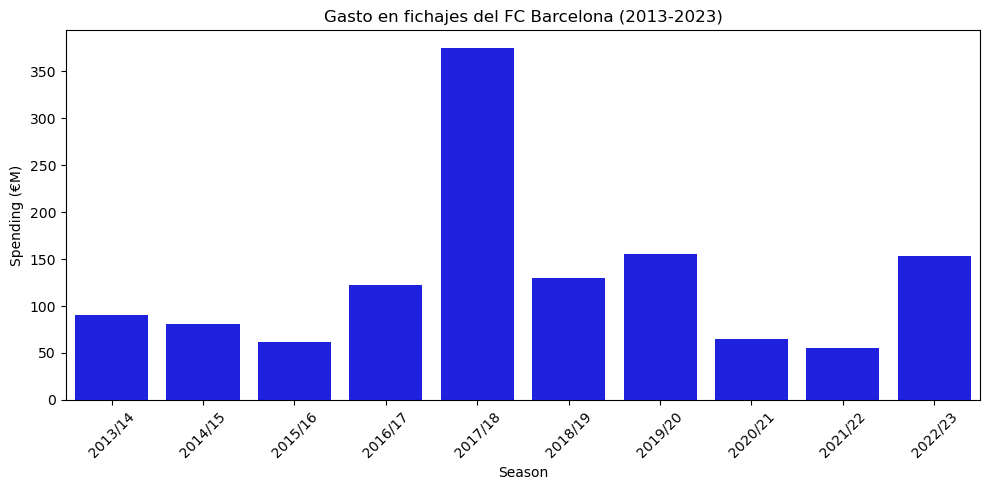

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gasto en fichajes por temporada
plt.figure(figsize=(10,5))
sns.barplot(x = "Season", y = "Spending (€M)", data = df, color = 'blue')
plt.title("Gasto en fichajes del FC Barcelona (2013-2023)")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

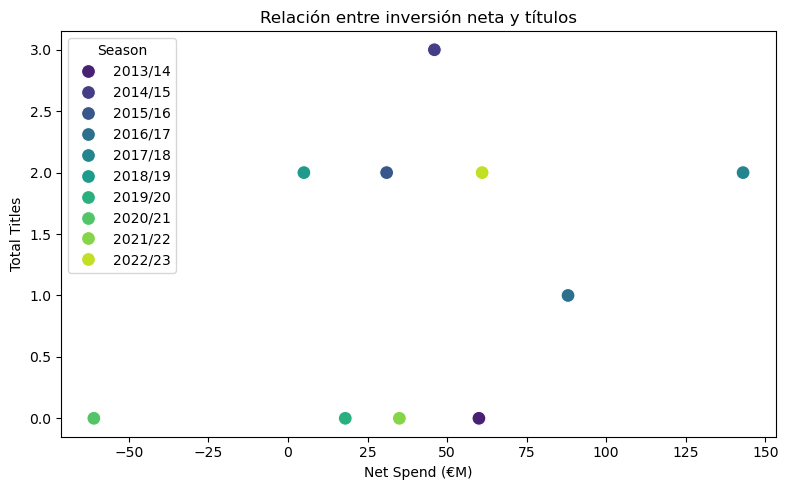

In [11]:
# Net Spend vs Títulos
plt.figure(figsize=(8,5))
sns.scatterplot(x="Net Spend (€M)", y = "Total Titles", data=df, hue= "Season", palette = "viridis", s = 100)
plt.title("Relación entre inversión neta y títulos")
plt.tight_layout()
plt.show()

# PASO 5: Análisis estadístico

In [13]:
# Correlación entre inversión y títulos
correlation = df["Net Spend (€M)"].corr(df["Total Titles"])
print(f"Correlación entre Net Spend y títulos ganados: {correlation:2f}")

Correlación entre Net Spend y títulos ganados: 0.356508


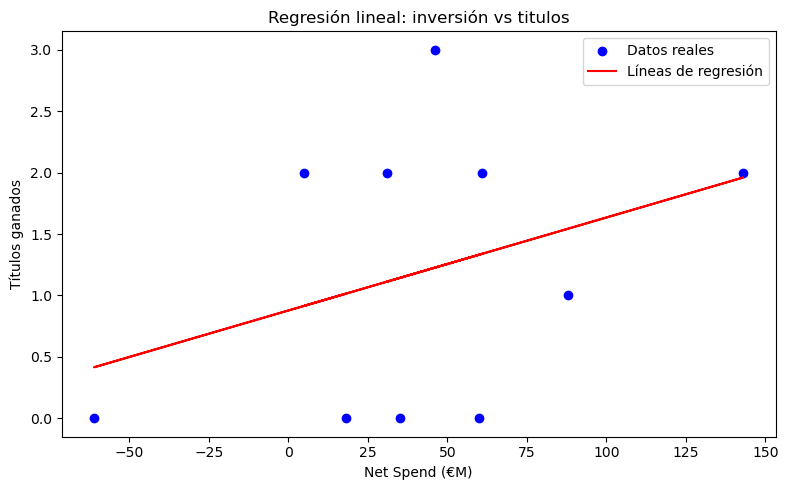

In [14]:
# Vamos a probar con una regresión lineal
from sklearn.linear_model import LinearRegression
import numpy as np
# Variables independientes y dependientes
X = df[["Net Spend (€M)"]]
y = df [["Total Titles"]]

# Creamos y entrenamos el modelo
model = LinearRegression()
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Gráfico de regresión
plt.figure(figsize=(8,5))
plt.scatter(X, y, color = 'blue', label = 'Datos reales')
plt.plot(X, y_pred, color = 'red', label = 'Líneas de regresión')
plt.title("Regresión lineal: inversión vs titulos")
plt.xlabel("Net Spend (€M)")
plt.ylabel("Títulos ganados")
plt.legend()
plt.tight_layout()
plt.show()

# PASO 6: Conclusiones

* Gasto máximo: La temporada 2017/18 con 375M € gastados.
* Mayor rendimiento deportivo: Fue en la temporada 2014/2015 que obtuvieron el triplete con un gasto moderado.
* Correlación débil entre inversión y títulos: Gastar más no garantiza ganar títulos
* Mejor relación coste/rendimiento: Temporadas con plantillas más equilibradas y menos gasto.